<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/Backpropag_xor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Backpropagation-xor


In [0]:
"""

Linked Education

Backpropagation XOR  saída linear (identidade)
hidden layer: 2 perceptrons com
ativação sigmoid

Código complementa planilha ANN-backprop.xlsm

Código adaptado de :
https://brilliant.org/wiki/backpropagation/

Atividade 1 : analisar código

Atividade 2: comparar resultados com a planilha ANN-backprop.xlsm

Atividade 3 : criar função custo (erro médio quadrático)
e traçar gáfico : iterações x custo

Atividade 4: inicializar com pesos randômicos (semente fixa)
e verificar número de iterações até a convergência


@author: Linked
"""

import numpy as np
import matplotlib.pyplot as plt

In [0]:


#função custo

def cost(ye,y):
    diff = ye - y
    return (1 / (2 *len(y))) * np.inner(diff, diff)

# sigmoid 
def sigmoid(x, derivative=False):

    if (derivative == True):
        return x * (1 - x)
    else:
        return 1 / (1 + np.exp(-x))

# pesos randômicos fixos..não utlizados
np.random.seed(1)

# learning rate
alpha = .1 

# nós na camada hidden
num_hidden = 2

# inputs
X = np.array([  
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
  
])


y = np.array([[0, 1, 1, 0]]).T



hidden_weights=np.array([[(np.random.random() * 2) - 1,  (np.random.random() * 2) - 1],
[(np.random.random() * 2) - 1, (np.random.random() * 2) - 1],
[(np.random.random() * 2) - 1, (np.random.random() * 2) - 1]
])


output_weights=np.array([[(np.random.random() * 2) - 1],[(np.random.random() * 2) - 1],[(np.random.random() * 2) - 1]])

# número de iterações : Gradient Descent
num_iterations = 15000 

costs=[]





total_hidden_gradient:
 [[-8.53231138e-16 -2.11661531e-15]
 [ 9.81426196e-16  8.67949391e-16]
 [ 9.37786309e-16  8.92931688e-16]] 

total_output_gradient:
 [[ 8.04911693e-16]
 [ 1.55466244e-15]
 [-2.06395251e-15]] 

hidden_weights:
 [[ 0.41655707  2.37733631]
 [-3.1820842  -1.74503488]
 [-3.2191845  -1.75503155]] 

output_weights:
 [[-0.7050418 ]
 [-3.24100544]
 [ 2.90494319]]


output_layer_outputs:
 [[1.46549439e-14]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.49720253e-14]]


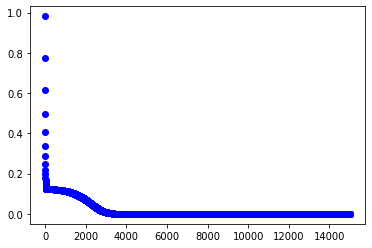

In [36]:
for i in range(num_iterations):

    # fase forward: obtem os outputs de todas as camadas
    # cria uma coluna de 1 (np.stack) no X (bias)
    input_layer_outputs = np.hstack((np.ones((X.shape[0], 1)), X))
    hidden_layer_outputs = np.hstack((np.ones((X.shape[0], 1)), sigmoid(np.dot(input_layer_outputs, hidden_weights))))
    output_layer_outputs = np.dot(hidden_layer_outputs, output_weights)

    costs.append(cost(output_layer_outputs.reshape((4,)),y.reshape((4,))))  
    # backward phase
    # Erro Output 
    output_error = output_layer_outputs - y
    # 
    # Bias não entra no cálculo
    hidden_error = hidden_layer_outputs[:, 1:] * (1 - hidden_layer_outputs[:, 1:]) * np.dot(output_error, output_weights.T[:, 1:])

    # Gradiente acumulado       
    hidden_pd = input_layer_outputs[:, :, np.newaxis] * hidden_error[: , np.newaxis, :]
    output_pd = hidden_layer_outputs[:, :, np.newaxis] * output_error[:, np.newaxis, :]

    # Gradiente médio (final)
    total_hidden_gradient = np.average(hidden_pd, axis=0)
    total_output_gradient = np.average(output_pd, axis=0)

    # update weights
    hidden_weights += - alpha * total_hidden_gradient
    output_weights += - alpha * total_output_gradient

print(
    'total_hidden_gradient:\n', total_hidden_gradient, 
    '\n\ntotal_output_gradient:\n', total_output_gradient, 
    '\n\nhidden_weights:\n', hidden_weights, 
    '\n\noutput_weights:\n', output_weights)

print('\n\noutput_layer_outputs:\n', output_layer_outputs)
plt.plot(costs, 'bo')
plt.show()